### Problem Statement

                    Build a Multiple Linear Regression Model
                        Predict demand for shared bikes

A US bike-sharing provider, BoomBikes, provides a bike-sharing service whihc makes bikes available ot individuals on a short term basis at a price or for free. During COVID, the company suffered considerable losses to revenue and wishes understand the demand for bikes better so that they may be in a better position to service the demand once the COVID situation improves.

So the goals are to:

                      Understand the demand for shared bikes
                          Prepare for the economic recovery 
                       Stand out from other service providers
                               Make huge profits.
                                 
This can be achieved by:

    Understanding the factors on which the demand for the shared bikes depends.
    Understanding the factors affecting demand for shared bikes in american market.

We need to know:

    1. Which variables are significant in predicting the demand fro shared bikes.
    2. How well do these variables describe the bike demands.


### Steps to Perform the Analysis:

    1.  Import and Understand the Data
    2.  Visualize the Numerical Variables
    3.  Visualize the Categorical Variables
    4.  Add Dummy Variables
    5.  Split the Data into Testing and Traning Sets
    6.  Rescale the Features
    7.  Build the Model Using StatsModels for Detailed Analysis
    8.  Build the Model Using RFE
    9.  Perform Residual Analysis of the Training Data
    10.  MAke PRedictions
    11. Evaluate the Model
    12. Producxe the Best Fit Line Equation
    13. Finally Check the Mean Squared Error 

### 1. Import and Understand the Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike_df = bike.drop(['instant', 'casual', 'registered', 'dteday', 'atemp'], axis=1, inplace=True)

In [5]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [6]:
bike.shape

(730, 11)

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [8]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


In [9]:
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

## 2. Visualize the data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

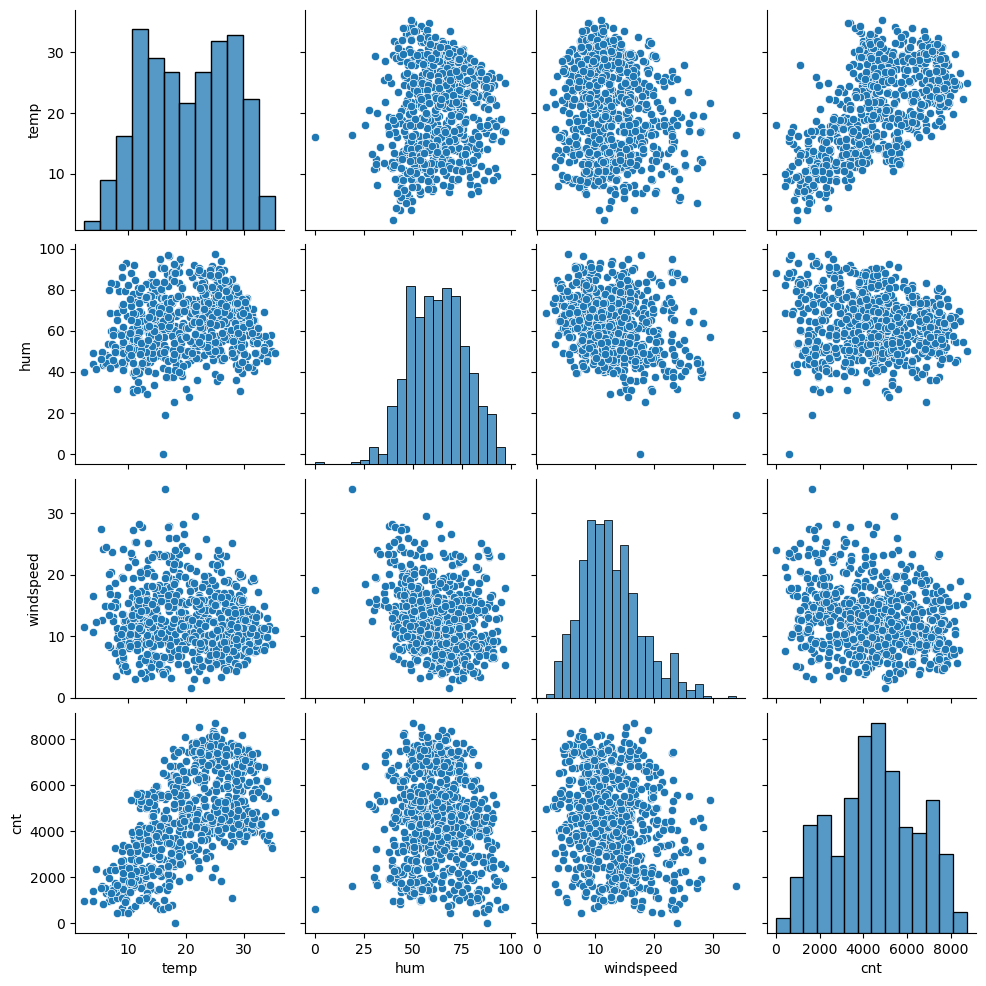

In [11]:
# Produce a pairplot of the numerical variables

sns.pairplot(bike, vars=['temp', 'hum', 'windspeed', 'cnt'])
plt.show()


Observations:
1. There appears to be strong correlation between cnt and temperature, humidity and windspeed.

## 3. Visualize the Categorical Data

In [12]:
# To visualize the categorical data we need to map the categorical
# variables to their codes to enable visualization.

bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


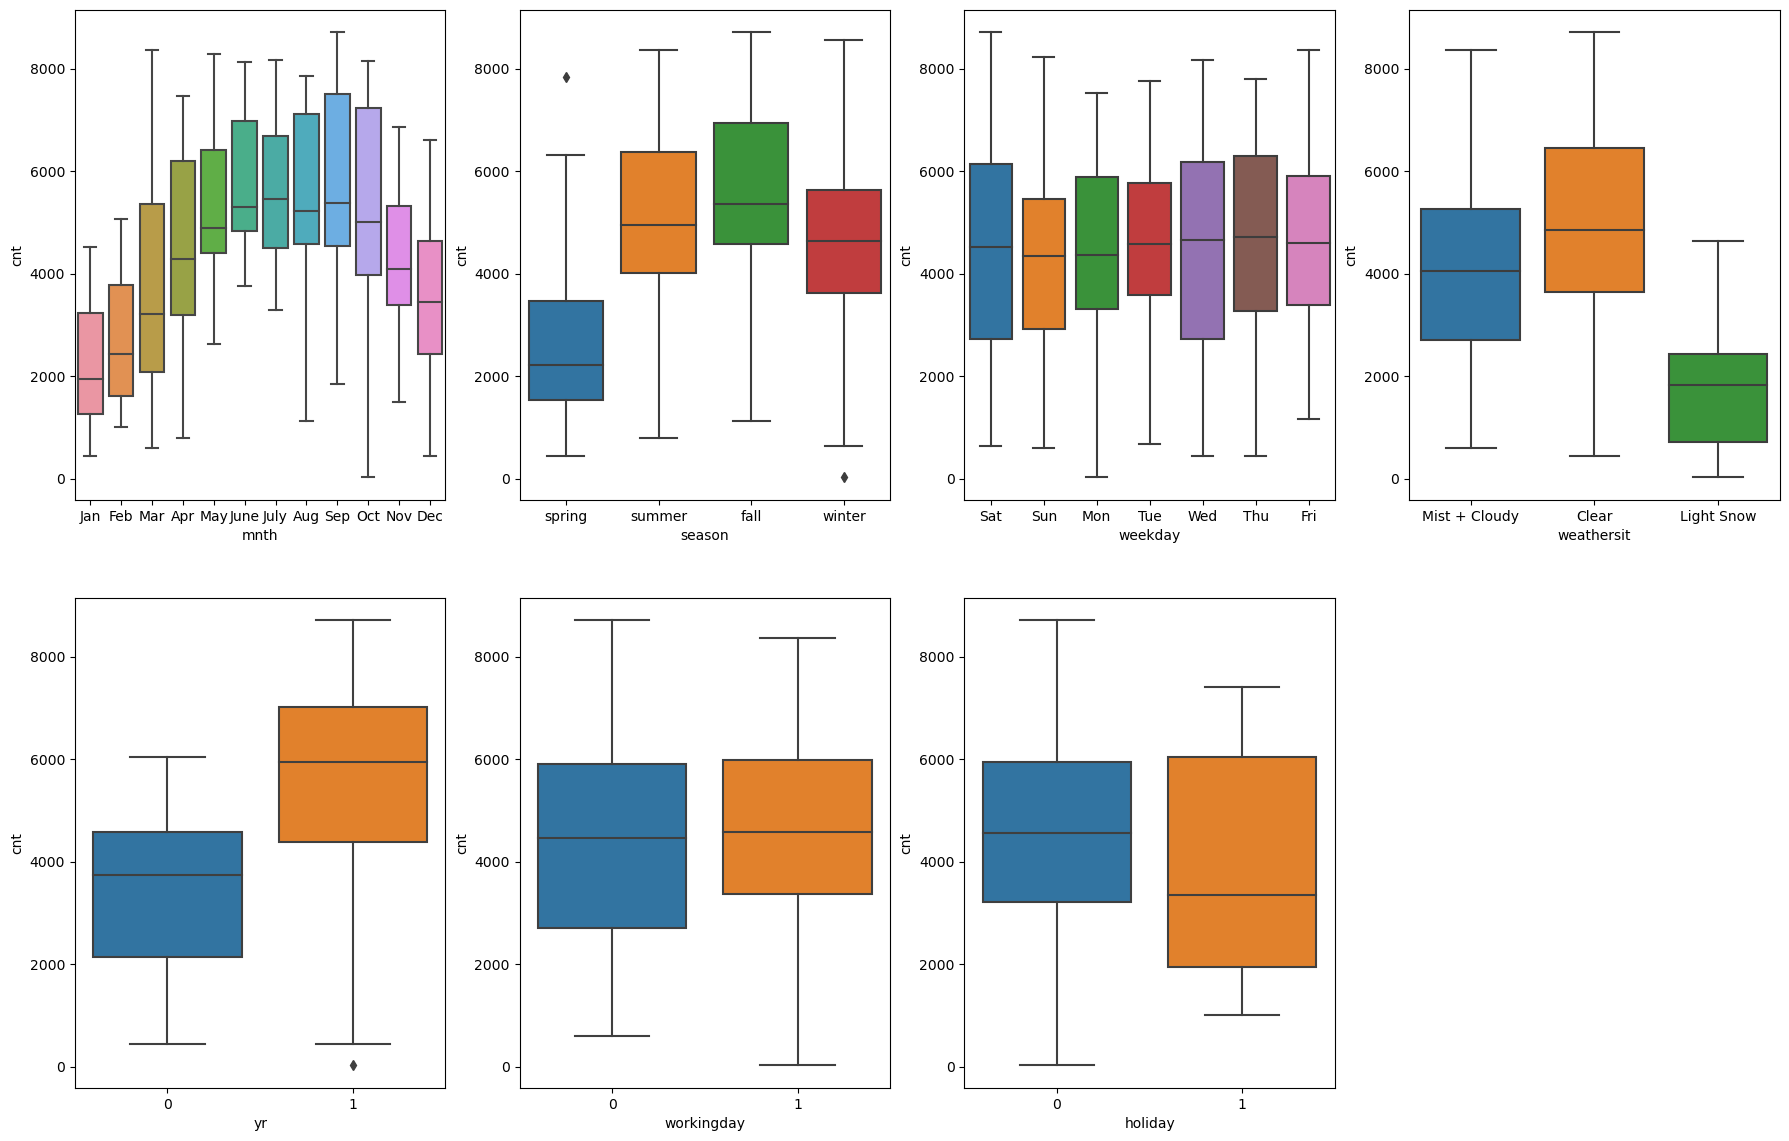

In [13]:
# Now it is possible to visualize the categorical variables

plt.figure(figsize=(22, 14))
plt.subplot(2, 4, 1)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(2, 4, 2)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.show()


Observations:
    
    1. Bike rental is highest during September and October.
    2. Bike rental is highest during Summer and Fall.
    3. Bike rental is highest on Saturday, Wednesday and Thursday.
    4. Bike rental is highest when the weather is clear.
    5. Bike rental was highest in 2019.
    6. Bike rental rates are similar on both working days and holidays.
    7. Bike renatl is highest during holidays.
    

In [14]:
# The next step is to create a heatmap to understand the correlation
# of the variables and determine if linear regression
# can be carried out on the data

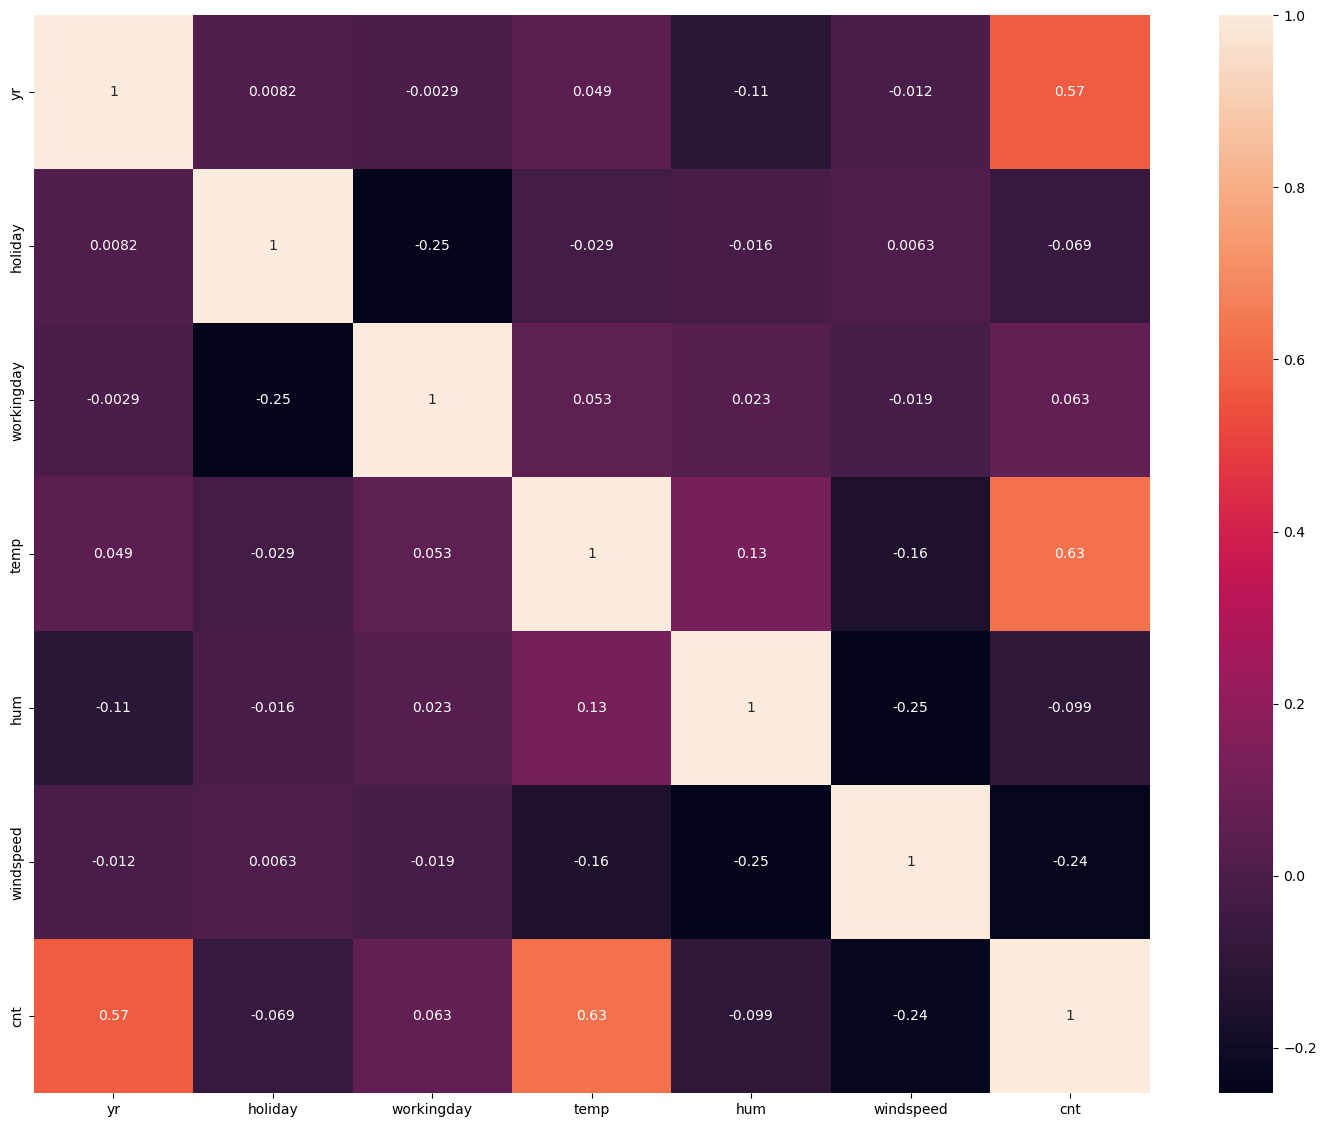

In [15]:
plt.figure(figsize=(18,14))
sns.heatmap(bike.corr(), annot=True)
plt.show()

In [16]:
# At this stage we should check the dataset again

In [17]:
bike.shape

(730, 11)

In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [19]:
bike.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [20]:
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [21]:
# The data is in good condition

### 4. Add Dummy Variables

In [22]:
# The next step is to add dummy variables for the
# categerical variables 
# Dummy variables are used to allow us to use nominal variables
# in our linear regression model

In [23]:
weathersit = pd.get_dummies(bike.weathersit, drop_first=True)
season = pd.get_dummies(bike.season, drop_first=True)
month = pd.get_dummies(bike.mnth, drop_first=True)
weekday = pd.get_dummies(bike.weekday, drop_first=True)

In [24]:
# Next we need to insert these dummy variables
# into the dataset

In [25]:
bike = pd.concat([bike, month, weekday, weathersit, season], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [26]:
# Now we can drop the variables that have been encoded

In [27]:
bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

In [28]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

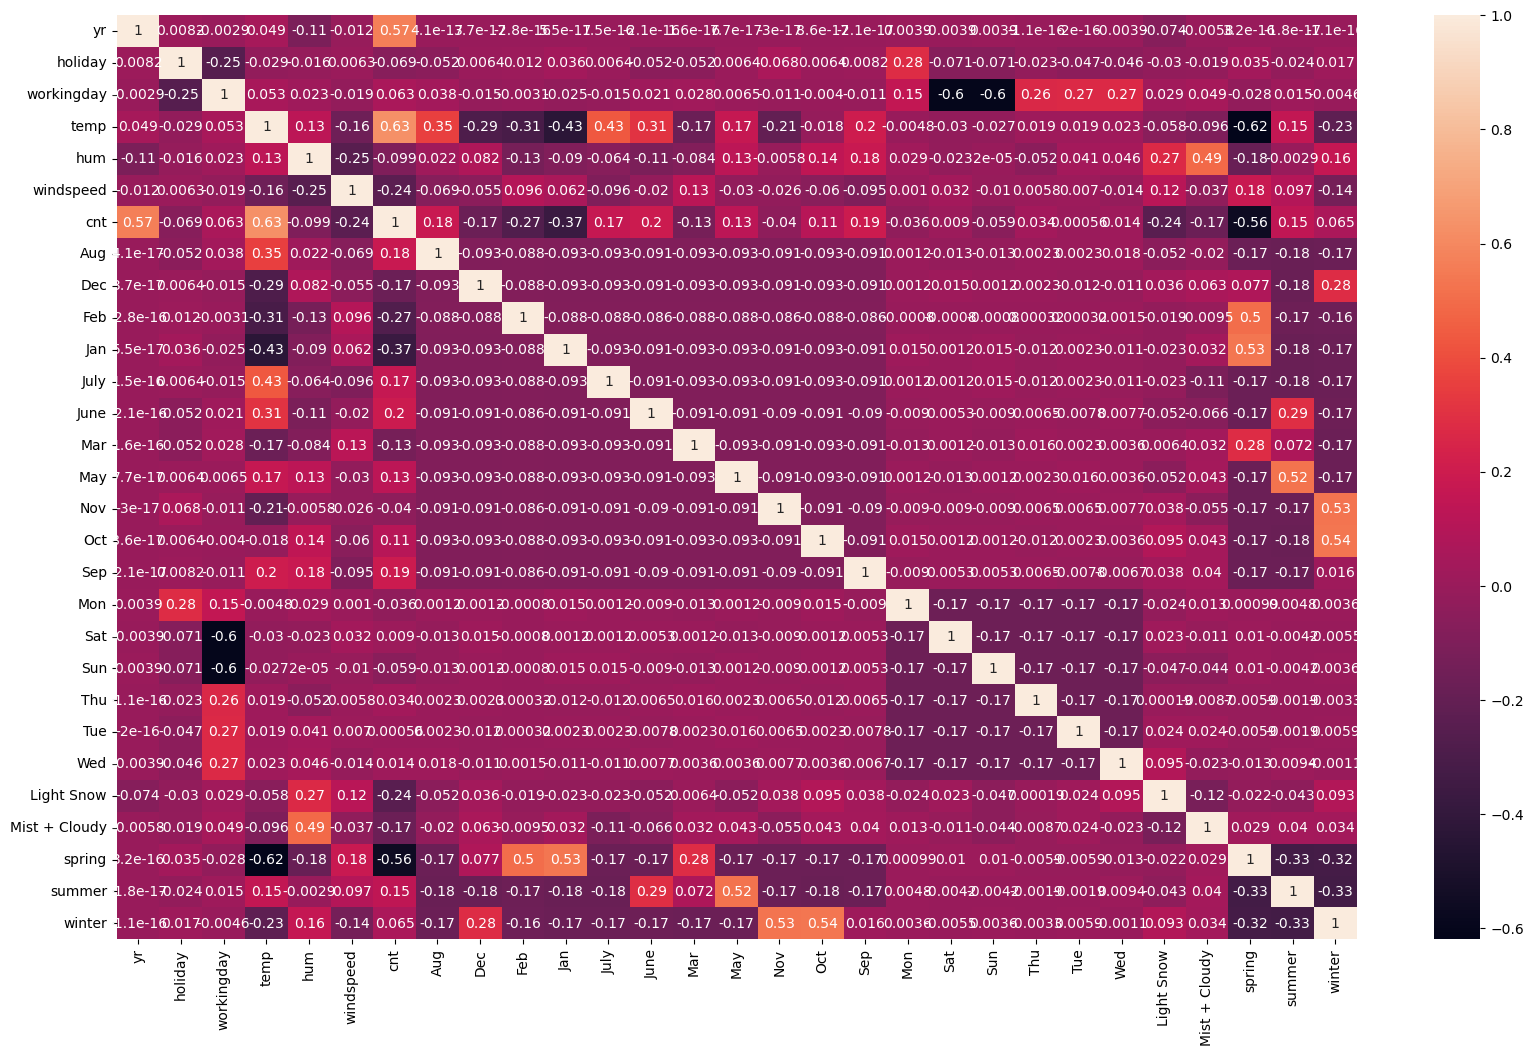

In [30]:
# Now a heatmap can be made to include the additional new variables

plt.figure(figsize=(20, 12))
sns.heatmap(bike.corr(), annot=True)
plt.show()


### 5. Split the Data into Training and Testing Sets

In [31]:
# Next we need to prepare the model for training with the training set of data
# and the testing set of data.

In [32]:
# The following libraries need to be imported first

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [34]:
# defining the two sets

bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)

In [35]:
# Next we should take a look at the split between training and test data sets

In [36]:
# Shape of the training data
bike_train.shape

(510, 29)

In [37]:
# Shape of the testing data
bike_test.shape

(220, 29)

In [38]:
# The above shapes confirm the 70/30 split of training/test data

### 6. Rescale the Features

In [39]:
# There are several variables which need ot be rescaled
# They include hum, windspeed, temp, and cnt
# To do this we use the scaler.fit_transform

In [40]:
scaler = MinMaxScaler()
scaler_variables = ['hum', 'windspeed', 'temp', 'cnt']
bike_train[scaler_variables] = scaler.fit_transform(bike_train[scaler_variables])

In [41]:
# Next we should view the values after scaling
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# We can see now that all variables are now between 0 and 1
# The next step is to produce a new heatmap to see the correlations
# after the scaling has been performed

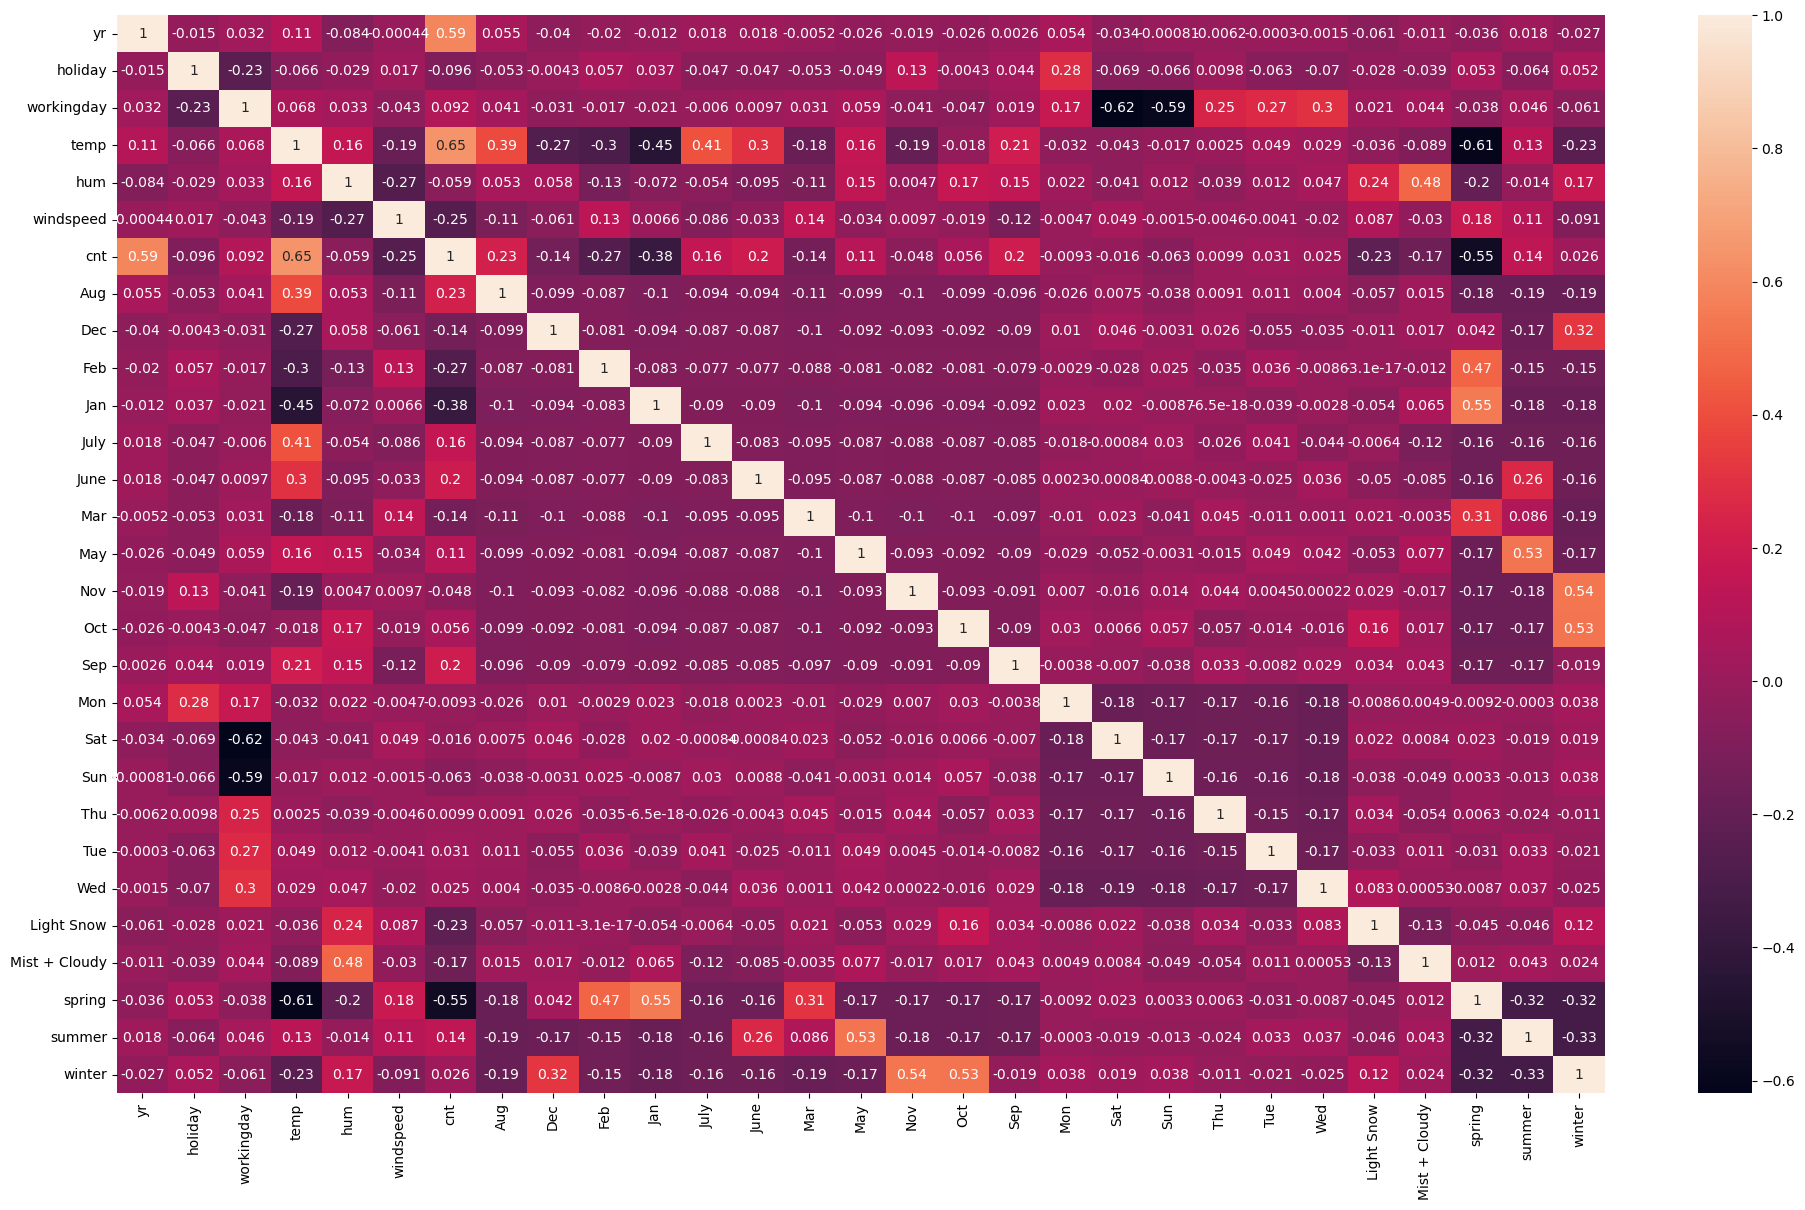

In [43]:
plt.figure(figsize = (24, 14))
sns.heatmap(bike_train.corr(), annot=True)
plt.show()

In [44]:
# Let's lok at some of the stronger correlations with pairplots

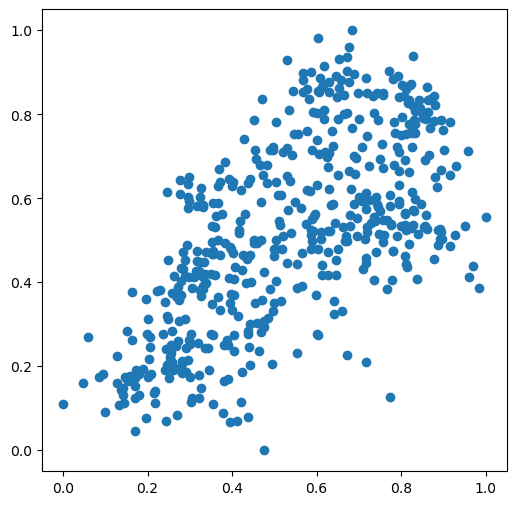

In [45]:
# cnt versus temp shows the highest correlation
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

### 7. Build the Model Using StatsModels for Detailed Analysis

### Divide into X and Y Sets for Training and Modelling

In [46]:
# The first step is start building the first model 
# We need to select the first variable to use
# This first model will use the variable temp

In [47]:
# Next we set up the variables for model building
# y_train and X_train

In [48]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [49]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [50]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [51]:
# Next we add a constant to the to X_train
# This is the intercept

X_train_sm = sm.add_constant(X_train['temp'])

# Create the first model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model
lr_model = lr.fit()

In [52]:
# Check the Parameters
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [53]:
# Summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           2.46e-61
Time:                        18:17:04   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    The above result for R-squared shows that 0.416, or 41.6% of the data in cnt can be explained by temp

In [54]:
# Now we can plot our data with a scatter plot.
# On this plot we can show the fitted regression line.

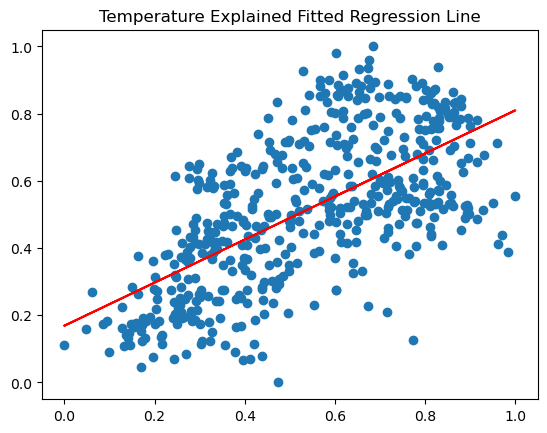

In [55]:
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Temperature Explained Fitted Regression Line')
plt.show()

In [56]:
# At this stage we can add more variables to check the impact.
# This is then multiple regression and we can determine which variables
# bring the greatest improvement ot the R-Squared value from the Model Summary

In [57]:
# Here we can add the variable yr to the X_train
X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [58]:
# Now check the model summary information
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.34e-130
Time:                        18:17:04   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

     R-squared has improved to 69.2%.

In [59]:
# We can add all the vairables
X_train_sm = sm.add_constant(X_train)

# Create the model number three
lr = sm.OLS(y_train,X_train_sm)

# Fit the model
lr_model = lr.fit()

# View the Parameters
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [60]:
# Next let's look at the summary information to see has R-Squared improved
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.00e-181
Time:                        18:17:04   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.88e+15
================================================================

   R-squared has improved to 85.3%, the cnt variance explained by all the variables.

### 8. Build the Model using RFE

In [61]:
# First how many columns are in the data
len(bike.columns)

29

In [62]:
# Next we must create the RFE object
lm = LinearRegression()
lm.fit(X_train,y_train)

# Set the variables to 15 for feature selection
rfe = RFE(lm, n_features_to_select = 15)

# Now fit the RFE onbect to the training data
rfe = rfe.fit(X_train, y_train)

In [63]:
# The next step is to see what features are selected 
# These are signified by True

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [65]:
# We should add the selected variables to on evariable
rfe_True = X_train.columns[rfe.support_]
rfe_True

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [66]:
# How many columns are in rfe_True
len(rfe_True)

15

In [67]:
# The next step is to build the model with the rfe_True selected variables,
# and create the training set with them.

In [68]:
X_train_rfe = X_train[rfe_True]

In [69]:
# Next add the constant to the training variable, create the first training model, fit it and
# view the summary

In [70]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.params

const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64

In [71]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        18:17:04   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# We need to examine the model VIF next and drop constant variables
# from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [73]:
# In this next step we calculate the model VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


In [74]:
# Now that we have the first P-Values and VIF vlaues we can begin removing
# those variables which meet the criteria for removal
# The criteria is as follows

# High p, High VIF = remove first
# High p, Low VIF = remove then check VIF again
# Low p, High VIF = remove later
# Low p, low VIF = retain

In [75]:
# hum and temp should be removed 
# they have high VIF and low p

X_train_update_1 = X_train_rfe.drop(['hum'], axis=1)


In [76]:
# Next add the constant to the training variable, create the first training model, fit it and
# view the summary
X_train_lr1 = sm.add_constant(X_train_update_1)
lr = sm.OLS(y_train, X_train_lr1)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        18:17:05   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.520      0.000       0.112       0.235
yr                0.2345      0.008     29.009      0.000       0.219       0.250
holiday          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday        0.0464      0.012      3.966      0.000       0.023       0.069
temp              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Jan              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July             -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep               0.0755      0.017      4.527      0.000       0.043       0.108
Sat               0.0583      0.015      3.968      0.000       0.029       0.087
Light Snow       -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist + Cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer            0.0445      0.015      2.967      0.003       0.015       0.074
winter            0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Next we again check the VIF
X_train_lr1 = X_train_lr1.drop(['const'], axis=1)

In [78]:
# And now calculate the VIF
vif = pd.DataFrame()
X = X_train_update_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,Sat,1.97
5,Jan,1.62
6,July,1.59


In [79]:
# Next we can drop temp as it has a moderateley high VIF and low p
X_train_update_2 = X_train_lr1.drop(['temp'], axis = 1)

In [80]:
# Next add the constant to the training variable, create the first training model, fit it and
# view the summary
X_train_lr2 = sm.add_constant(X_train_update_2)
lr = sm.OLS(y_train, X_train_lr2)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          6.44e-154
Time:                        18:17:05   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5444      0.020     27.118      0.000       0.505       0.584
yr                0.2478      0.009     26.153      0.000       0.229       0.266
holiday          -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday        0.0478      0.014      3.466      0.001       0.021       0.075
windspeed        -0.1878      0.029     -6.426      0.000      -0.245      -0.130
Jan              -0.1026      0.020     -5.112      0.000      -0.142      -0.063
July             -0.0095      0.021     -0.446      0.656      -0.052       0.032
Sep               0.0710      0.020      3.610      0.000       0.032       0.110
Sat               0.0562      0.017      3.243      0.001       0.022       0.090
Light Snow       -0.3034      0.029    -10.593      0.000      -0.360      -0.247
Mist + Cloudy    -0.0882      0.010     -8.688      0.000      -0.108      -0.068
spring           -0.2602      0.018    -14.483      0.000      -0.296      -0.225
summer           -0.0427      0.016     -2.651      0.008      -0.074      -0.011
winter           -0.0762      0.016     -4.903      0.000      -0.107      -0.046
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Next we again check the VIF
X_train_lr2 = X_train_lr2.drop(['const'], axis=1)

In [82]:
# And now calculate the VIF
vif = pd.DataFrame()
X = X_train_update_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
10,spring,2.97
11,summer,2.29
12,winter,1.98
0,yr,1.91
7,Sat,1.69
4,Jan,1.60
9,Mist + Cloudy,1.57
5,July,1.30


In [83]:
# July has a low p and high VIF and can be removed now
X_train_update_3 = X_train_lr2.drop(['July'], axis = 1)

In [84]:
# Next add the constant to the training variable, create the first training model, fit it and
# view the summary
X_train_lr3 = sm.add_constant(X_train_update_3)
lr = sm.OLS(y_train, X_train_lr3)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.73e-155
Time:                        18:17:05   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5406      0.018     29.655      0.000       0.505       0.576
yr                0.2478      0.009     26.179      0.000       0.229       0.266
holiday          -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday        0.0481      0.014      3.489      0.001       0.021       0.075
windspeed        -0.1877      0.029     -6.429      0.000      -0.245      -0.130
Jan              -0.1027      0.020     -5.118      0.000      -0.142      -0.063
Sep               0.0737      0.019      3.933      0.000       0.037       0.111
Sat               0.0564      0.017      3.254      0.001       0.022       0.090
Light Snow       -0.3035      0.029    -10.606      0.000      -0.360      -0.247
Mist + Cloudy    -0.0879      0.010     -8.685      0.000      -0.108      -0.068
spring           -0.2568      0.016    -15.797      0.000      -0.289      -0.225
summer           -0.0393      0.014     -2.768      0.006      -0.067      -0.011
winter           -0.0730      0.014     -5.303      0.000      -0.100      -0.046
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Next we again check the VIF
X_train_lr3 = X_train_lr3.drop(['const'], axis=1)

In [86]:
# And now calculate the VIF
vif = pd.DataFrame()
X = X_train_update_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
9,spring,2.68
10,summer,2.01
0,yr,1.89
11,winter,1.78
6,Sat,1.62
4,Jan,1.60
8,Mist + Cloudy,1.57
5,Sep,1.20


In [87]:
# holiday has a high p and low VIF so will be removed now

In [88]:
X_train_update_4 = X_train_lr3.drop(['holiday'], axis = 1)

In [89]:
# Next add the constant to the training variable, create the first training model, fit it and
# view the summary
X_train_lr4 = sm.add_constant(X_train_update_4)
lr = sm.OLS(y_train, X_train_lr4)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.01e-155
Time:                        18:17:05   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5332      0.018     30.023      0.000       0.498       0.568
yr                0.2480      0.009     26.146      0.000       0.229       0.267
workingday        0.0564      0.013      4.353      0.000       0.031       0.082
windspeed        -0.1887      0.029     -6.450      0.000      -0.246      -0.131
Jan              -0.1033      0.020     -5.138      0.000      -0.143      -0.064
Sep               0.0715      0.019      3.815      0.000       0.035       0.108
Sat               0.0648      0.017      3.887      0.000       0.032       0.098
Light Snow       -0.3023      0.029    -10.546      0.000      -0.359      -0.246
Mist + Cloudy    -0.0874      0.010     -8.623      0.000      -0.107      -0.067
spring           -0.2581      0.016    -15.860      0.000      -0.290      -0.226
summer           -0.0394      0.014     -2.768      0.006      -0.067      -0.011
winter           -0.0743      0.014     -5.392      0.000      -0.101      -0.047
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Next we again check the VIF
X_train_lr4 = X_train_lr4.drop(['const'], axis=1)

In [91]:
# And now calculate the VIF
vif = pd.DataFrame()
X = X_train_update_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,2.00
0,yr,1.88
10,winter,1.73
3,Jan,1.60
7,Mist + Cloudy,1.57
5,Sat,1.56
4,Sep,1.18


At this stage all p values are low and all VIF values are low.

Points to note

1. We can reject the null hypothesis because all of the p-values are <0.05.
2. The VIF is <5 for each variable.
3. The R-squared value is sufficiently high to suggest strong correlation between cnt and the independent variables.

### 9. Residual Analysis of the Training Data

In [92]:
# Next we must perform the Residual Analysis
X_train_lr4 = sm.add_constant(X_train_lr4)
X_train_lr4

,const,yr,workingday,windspeed,Jan,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,0,0,1,0,1,1,0,0
728,1.0,1,0,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.188475,0,0,1,0,1,0,1,0
111,1.0,0,1,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,1,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0,0.431816,0,0,1,0,1,0,0,1
79,1.0,0,1,0.529881,0,0,0,0,1,0,1,0


In [93]:
# Next we need to obtain the y_train_pred for Residual Analysis
y_train_pred = lr_model.predict(X_train_lr4)

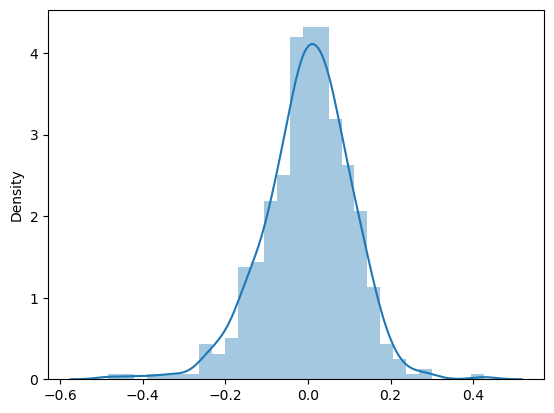

In [94]:
# Define the residual
res = y_train - y_train_pred
# We need to plot the distribution of the error
sns.distplot(res)
plt.show()

### 10. Make Predictions

In [95]:
# Next we need to use MinMaxScaling to standardize the test data set
# What are the scaler variables

scaler_variables


['hum', 'windspeed', 'temp', 'cnt']

In [96]:
# Scale the test data. Fit the training dataset, 
# transform the test dataset (based on the fit of the traniing dataset)

In [97]:
bike_test[scaler_variables] = scaler.transform(bike_test[scaler_variables])

In [98]:
# Now let us look at the data
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
# Now we can build the test model with the temp variable
y_test = bike_test.pop('cnt')
X_test = bike_test

In [100]:
# Look at the values
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [101]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [102]:
# Showing the list of feature variables
X_train_lr4.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'Jan', 'Sep', 'Sat',
       'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [103]:
# Drop the constant
X_train_lr4.drop(columns='const', inplace=True)

In [104]:
# Next we must create the new set of X_test data from the feature variables using RFE method
X_test_new = X_test[X_train_lr4.columns]
# adding the constant variable
X_test_new = sm.add_constant(X_test_new)

In [105]:
# Now we make the predictions
y_pred = lr_model.predict(X_test_new)

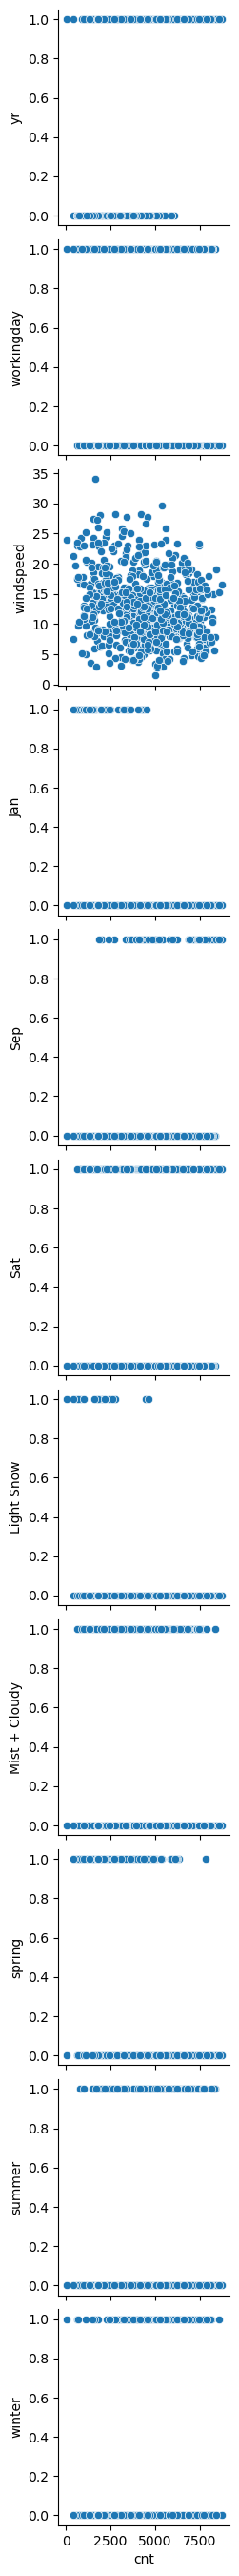

<Figure size 1800x1400 with 0 Axes>

In [106]:
# And build the scatter plots to view dependent versus feature variables
sns.pairplot(bike, y_vars = X_train_lr4.columns, x_vars = 'cnt')
plt.figure(figsize = (18, 14))
plt.show()

### 11. Evaluate the Model

In [107]:
# Now we predict and evaluate the test data set

In [108]:
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('The test data r2 score is', r2_test)

The test data r2 score is 0.7417351441317017


In [109]:
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('The train data r2 score is', r2_train)

The train data r2 score is 0.7791032979320818


In [110]:
# Plot y_pred and y_test

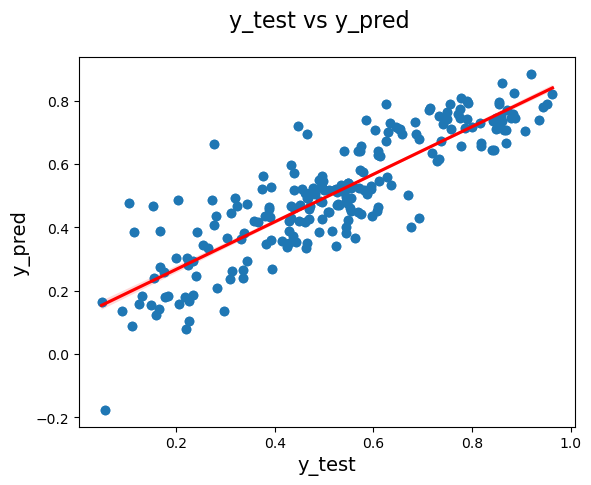

In [111]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

### 12. Produce the Best Fitted Line Equation

In [112]:
# The best fitted line equation is as follows:

cnt = 0.5332 + 0.2480xyr + 0.0564xworkingway - 0.1887xwindspeed - 0.1033xJan + 0.0715xSep + 0.0648xSat - 0.3023xLight Snow - 0.0874xMist + Cloudy - 0.2581xspring - 0.0394xsummer - 0.0743xwinter 

### 13. Check the Mean Squared Error

In [113]:
# Calculate the mean squared error

train_meansqer = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_meansqer = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('The training set Mean Squared Eror is:', train_meansqer)
print('The test set Mean Squared Error is:', test_meansqer)


The training set Mean Squared Eror is: 0.011103586137637728
The test set Mean Squared Error is: 0.012348748005441876


### Conclusions

1. Bike demand is heavily dependant on season, with spring showing greatest demand followed by winter and then summer.
2. The mean squared error is almost zero for both the training and testing data.
3. The R-squared value of the test set is 74.2% and the value for the train set is 77.9%. There is good alignment between these two values so we can say that the variance was predicted well on the test set so this can be said to be a good model.
4. The business efforts around more bike sales should include focusing on the spring season, the winter months and when the weather is not best.